<a href="https://colab.research.google.com/github/thinhngu/kit_old_gitlab/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Dataset/Training/Train",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    subset='training'
    ) # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Dataset/Training/Train",
    target_size=(224, 224),
    batch_size=164,
    class_mode='binary',
    subset='validation'
    ) # set as validation data


Found 16930 images belonging to 2 classes.
Found 4232 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="sigmoid"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])



hist = model.fit_generator(train_generator,steps_per_epoch=64, validation_data = validation_generator,validation_steps=64,epochs=100,callbacks=[checkpoint,early])


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
64/64 [==============================] - 59s 902ms/step - loss: 2295.9278 - accuracy: 0.5321 - val_loss: 0.6908 - val_accuracy: 0.5239
Epoch 2/100
64/64 [==============================] - 25s 394ms/step - loss: 0.6953 - accuracy: 0.5297
Epoch 3/100
64/64 [==============================] - 26s 396ms/step - loss: 0.7137 - accuracy: 0.5435
Epoch 4/100
64/64 [==============================] - 25s 395ms/step - loss: 0.7203 - accuracy: 0.5100
Epoch 5/100
64/64 [==============================] - 26s 396ms/step - loss: 0.7188 - accuracy: 0.5242
Epoch 6/100
64/64 [==============================] - 26s 396ms/step - loss: 0.6939 - accuracy: 0.5252
Epoch 7/100
64/64 [==============================] - 25s 394ms/step - loss: 0.7049 - accuracy: 0.5272
Epoch 8/100
64/64 [==============================] - 25s 395ms/step - loss: 0.7048 - accuracy: 0.5290
Epoch 9/100
64/64 [==============================] - 25s 393ms/step - loss: 0.8434 - accuracy: 0.5743
Epoch 10/100
64/64 [=================

KeyError: ignored

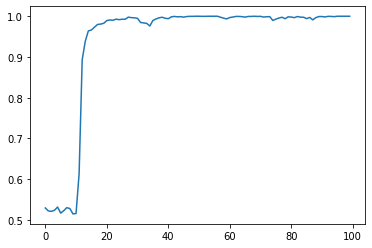

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()